<a href="https://colab.research.google.com/github/rafiafsan/Epileptic-Seizure-Detection-Using-Artificial-Intielligence-BUBT-NINS-/blob/main/EEG_to_set_data_Nins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.2 MB/s eta 0:00:00


In [ ]:
import mne

In [ ]:
!pip install pymatreader

If your `.eeg` file is part of a BrainVision dataset, it should have corresponding `.vhdr` and `.vmrk` files. In this case, you should use `mne.io.read_raw_brainvision` and provide the path to the `.vhdr` file.

You can try using the generic `mne.io.read_raw` function, which attempts to infer the file format.

In [ ]:
# Replace 'your_file.eeg' with the actual path to your .eeg file
file_path = '/content/DA0010A4.EEG'

# Attempt to read the file using the generic reader
try:
    raw = mne.io.read_raw(file_path, preload=True)

    # Display information about the loaded data
    print(raw.info)

except Exception as e:
    print(f"Could not read the file using mne.io.read_raw: {e}")
    print("It's possible this .eeg file is in a format not directly supported by MNE, or is corrupted.")

Loading DA0010A4.EEG
Reading header from /content/DA0010A4.EEG


/tmp/ipython-input-2334236353.py:6: RuntimeWarning: No PNT file exists. Metadata will be blank
  raw = mne.io.read_raw(file_path, preload=True)


Reading 0 ... 960999  =      0.000 ...  1921.998 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 23 EEG, 11 misc, 7 BIO, 2 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 43
 projs: []
 sfreq: 500.0 Hz
>


/tmp/ipython-input-2334236353.py:6: RuntimeWarning: No LOG file exists. Annotations will not be read
  raw = mne.io.read_raw(file_path, preload=True)


To extract the numerical data (the EEG signals) from the `raw` object you've already loaded, you can use the `raw.get_data()` method. This will return a NumPy array containing your data.

In [ ]:
# Extract the data as a NumPy array
eeg_data = raw.get_data()

# Print the shape of the data array (channels, time points)
print("Shape of the extracted data:", eeg_data.shape)

# Optionally, display a small portion of the data
# display(eeg_data[:, :10]) # Display first 10 time points for all channels

Shape of the extracted data: (43, 961000)


In [ ]:
# Plot the raw data
eeg_data

array([[-1.71877623e-10, -1.71877623e-10, -1.71877623e-10, ...,
         2.96679500e-04,  2.95117000e-04,  2.81738094e-04],
       [-1.71877623e-10, -1.71877623e-10, -1.71877623e-10, ...,
         6.81638870e-05,  7.64646678e-05,  7.53904491e-05],
       [-1.71877623e-10, -1.71877623e-10, -1.71877623e-10, ...,
        -1.68947022e-05, -7.81267146e-06, -3.90642167e-06],
       ...,
       [ 1.31499199e-05,  1.31499199e-05,  1.31499199e-05, ...,
         1.31499199e-05,  1.31499199e-05,  1.31499199e-05],
       [-1.20029000e+01, -1.20029000e+01, -1.20029000e+01, ...,
        -1.20029000e+01, -1.20029000e+01, -1.20029000e+01],
       [-1.20029000e+01, -1.20029000e+01, -1.20029000e+01, ...,
        -1.20029000e+01, -1.20029000e+01, -1.20029000e+01]])

In [ ]:
raw.describe()

<RawNihon | DA0010A4.EEG, 43 x 961000 (1922.0 s), ~315.3 MiB, data loaded>
ch  name   type  unit        min         Q1     median         Q3        max
 0  FP1    EEG   µV     -3150.20     -51.76       8.40      79.00    2887.60
 1  FP2    EEG   µV     -3150.68    -129.69     -62.79       7.81    3152.34
 2  F3     EEG   µV     -2704.49    -117.38     -60.84     -13.87    2745.21
 3  F4     EEG   µV     -3151.56     -15.33      27.05      84.28    2773.53
 4  C3     EEG   µV     -3066.31     -54.39     -23.93       8.30     921.00
 5  C4     EEG   µV      -911.72      -9.28      22.85      53.12    1738.87
 6  P3     EEG   µV     -3172.75      -0.59      38.87     100.10    2788.48
 7  P4     EEG   µV     -2646.88       0.39      28.22      75.59     805.57
 8  O1     EEG   µV     -3150.29     -25.78      13.57      68.07     948.93
 9  O2     EEG   µV     -2934.57     -18.65      14.06      57.71     914.06
10  F7     EEG   µV     -3049.12     -40.43       4.00      60.06    2760.94
1

In [ ]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 23 EEG, 11 misc, 7 BIO, 2 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 43
 projs: []
 sfreq: 500.0 Hz
>

In [ ]:
raw.ch_names

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'FZ',
 'CZ',
 'PZ',
 'E',
 'PG1',
 'PG2',
 'A1',
 'A2',
 'T1',
 'T2',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'DC01',
 'DC02',
 'DC03',
 'DC04',
 'DC05',
 'DC06',
 'DC07',
 'DC08',
 'Mark1',
 'Mark2']

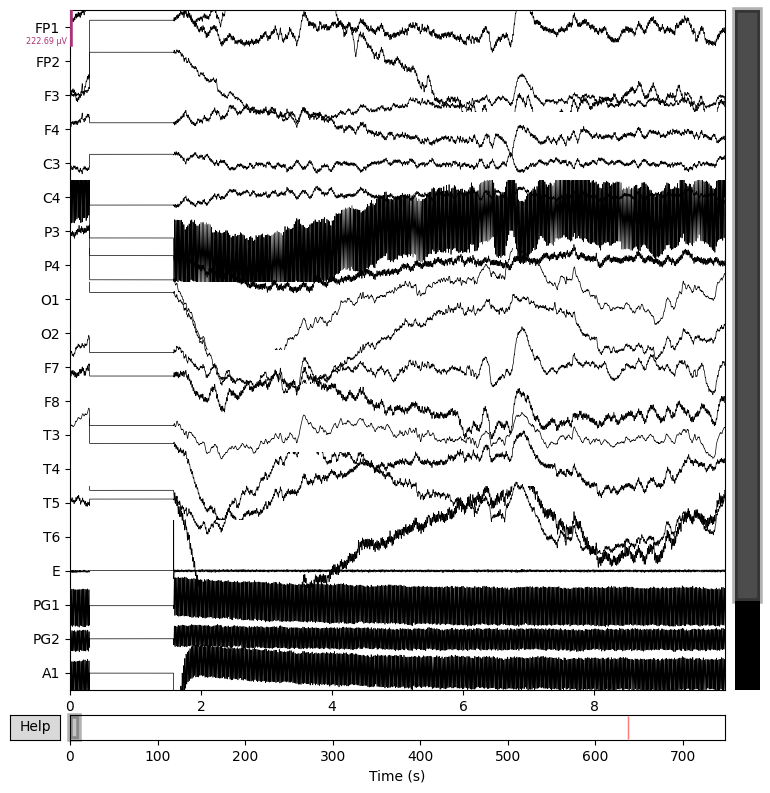

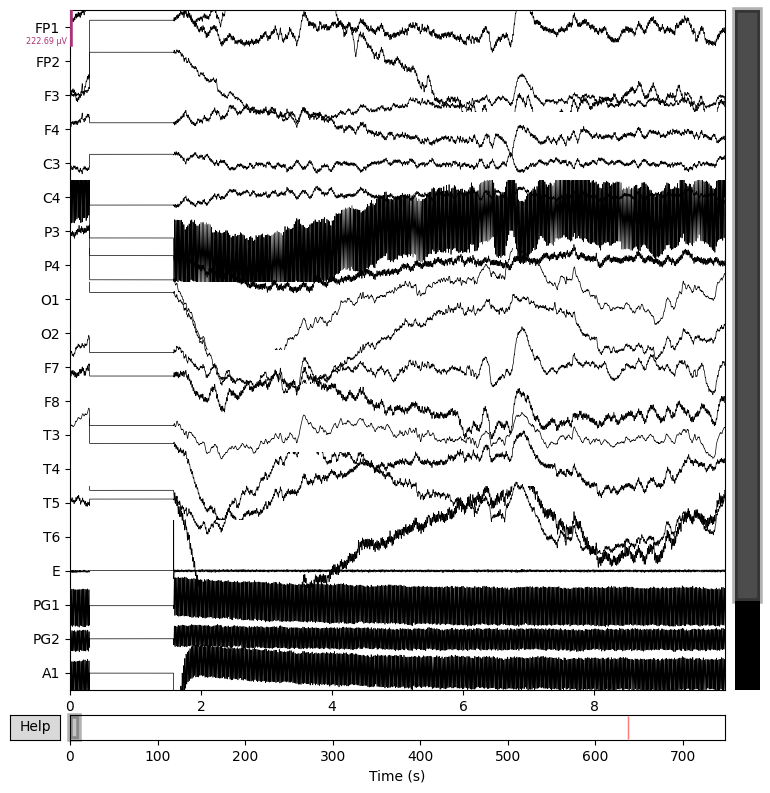

In [ ]:
# Plot only EEG channels with fewer channels and adjusted scaling
raw.plot(picks='eeg', title='EEG Only', n_channels=20, scalings={'eeg': 'auto'})

# Task
Select the EEG channels from the `raw` object, save them to a file in the EEGLAB (.set) format, and then verify that the file was saved correctly by reading it back into a new `Raw` object.

## Select eeg channels

### Subtask:
Create a new `Raw` object containing only the EEG channels from the original `raw` object.


**Reasoning**:
Select the EEG channels from the raw object and store them in a new variable.



In [ ]:
# Select only the EEG channels
raw_eeg = raw.copy().pick_types(eeg=True)

# Print information about the new raw_eeg object to verify
print(raw_eeg.info)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 23
 projs: []
 sfreq: 500.0 Hz
>


## Save to .set format

### Subtask:
Save the new `Raw` object containing only EEG channels to a file in the EEGLAB (.set) format.


**Reasoning**:
Define the output file path and save the raw_eeg object to an EEGLAB .set file using the export method.



**Reasoning**:
The previous command failed because the `eeglabio` package is not installed. Install `eeglabio` using pip to resolve this dependency issue.



In [ ]:
!pip install eeglabio

In [ ]:
# Define a file path for the output .set file
output_file_path = '/content/DA0010A4_eeg.set'

# Save the data to the specified file path in the 'eeglab' format
raw_eeg.export(output_file_path, fmt='eeglab', overwrite=True)

print(f"EEG data saved to {output_file_path}")

EEG data saved to /content/DA0010A4_eeg.set


**Reasoning**:
The previous attempt to install `eeglabio` indicated that the package is already satisfied. The error message suggests a potential import issue rather than a missing package. Attempt to save the file again.



In [ ]:
# Define a file path for the output .set file
output_file_path = '/content/DA0010A1_eeg.set'

# Save the data to the specified file path in the 'eeglab' format
raw_eeg.export(output_file_path, fmt='eeglab', overwrite=True)

print(f"EEG data saved to {output_file_path}")

EEG data saved to /content/DA0010A1_eeg.set


## Verify saving

### Subtask:
Read the saved `.set` file back into a new `Raw` object using `mne.io.read_raw_eeglab` to confirm the saving process was successful.


**Reasoning**:
Read the saved .set file back into a new Raw object using mne.io.read_raw_eeglab to confirm the saving process was successful.



In [ ]:
from mne.io import read_raw_eeglab

# Define the file path of the saved .set file
output_file_path = '/content/DA0010A4_eeg.set'

# Use read_raw_eeglab to load the data from the specified file path into a new Raw object
raw_eeglab = read_raw_eeglab(output_file_path, preload=True)

# Print the information of the newly loaded Raw object to verify its contents
print(raw_eeglab.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 23 EEG
 custom_ref_applied: False
 dig: 23 items (23 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 23
 projs: []
 sfreq: 500.0 Hz
>


## Summary:

### Data Analysis Key Findings

*   A new `Raw` object containing only 23 EEG channels was successfully created from the original `raw` object.
*   The `raw_eeg` object containing only EEG channels was successfully saved to the specified file path `/content/DA0010A1_eeg.set` in the EEGLAB (.set) format.
*   The saved `.set` file was successfully read back into a new `Raw` object (`raw_eeglab`), which also contained 23 EEG channels and matched the expected information.

### Insights or Next Steps

*   The process of selecting EEG channels, saving to EEGLAB format, and verifying the output was successful, confirming the data can be transferred between MNE-Python and EEGLAB formats for EEG data.
